In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import seaborn as sns
from matplotlib import pyplot as mp
from tensorflow.keras import layers, regularizers
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")

2023-04-21 05:54:59.354737: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


**Importing training data**

In [2]:
data = pd.read_csv("/Users/gayathri/Documents/bigdata/MLF_GP1_CreditScore.csv")# Replace "your_dataset.csv" with the actual filename of your dataset

In [3]:
data.head()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd,Rating
0,-0.005496,0.030763,0.018885,0.024515,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.136748,0.392143,-0.184887,0.062781,0.148305,0.100409,0.163266,0.102521,1,A1
1,-0.005496,0.030763,0.088716,0.094733,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.214657,0.392143,-0.184887,0.062781,0.148305,-0.089598,0.163266,0.102521,1,A1
2,-0.007045,0.023159,0.088716,0.096440,0.108590,0.039410,0.034268,0.009059,0.250371,0.101315,...,0.205290,0.483257,-0.017877,0.121357,0.110656,-0.045142,0.105711,0.103378,1,A1
3,-0.009396,0.028400,0.088716,0.099046,0.146137,0.030071,0.036938,-0.016964,0.356994,-0.052606,...,0.232991,0.996955,-0.122017,0.079051,0.151639,-0.008231,0.162421,0.132295,1,A1
4,-0.009009,0.027714,0.088716,0.098611,0.123500,0.024224,0.034445,-0.034132,0.461894,-0.090869,...,0.172906,1.711426,-0.161561,0.084319,0.130435,0.015528,0.156427,0.225144,1,A1


**Data Type of features**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sales/Revenues            1700 non-null   float64
 1   Gross Margin              1700 non-null   float64
 2   EBITDA                    1700 non-null   float64
 3   EBITDA Margin             1700 non-null   float64
 4   Net Income Before Extras  1700 non-null   float64
 5   Total Debt                1700 non-null   float64
 6   Net Debt                  1700 non-null   float64
 7   LT Debt                   1700 non-null   float64
 8   ST Debt                   1700 non-null   float64
 9   Cash                      1700 non-null   float64
 10  Free Cash Flow            1700 non-null   float64
 11  Total Debt/EBITDA         1700 non-null   float64
 12  Net Debt/EBITDA           1700 non-null   float64
 13  Total MV                  1700 non-null   float64
 14  Total De

**Describing the each columns**

In [5]:
data.describe()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,0.050378,0.026007,0.068718,0.021074,0.123026,0.822405,-0.419810,1.255168,3.142797,0.466620,...,-0.189317,0.298785,-0.855714,0.436002,0.072802,0.032196,0.497705,0.019394,-0.217604,0.757059
std,0.161910,0.273768,0.237365,0.189025,14.475689,13.317075,28.385702,16.224453,51.986550,1.859494,...,5.668669,5.265291,22.926862,1.904282,0.266471,6.151994,12.102502,14.594193,15.389000,0.428986
min,-0.661715,-0.794722,-0.782254,-0.805153,-289.000000,-0.903014,-493.305578,-0.921515,-0.997692,-0.990982,...,-161.609425,-0.991976,-502.000000,-0.994141,-0.684678,-96.250000,-59.795133,-305.462167,-373.837267,0.000000
25%,-0.005693,-0.020028,-0.022640,-0.042771,-0.158478,-0.076316,-0.120725,-0.094767,-0.337959,-0.195117,...,-0.115159,-0.096996,-0.857013,-0.227327,-0.072734,-0.152894,-0.293521,-0.208483,-0.233955,1.000000
50%,0.034000,0.003403,0.049482,0.011134,0.056627,0.005886,-0.003060,-0.002078,0.043092,0.075820,...,0.046983,0.043216,-0.229098,0.040446,0.041785,0.066027,-0.040405,-0.009403,-0.020392,1.000000
75%,0.083004,0.025595,0.124533,0.060566,0.222219,0.136449,0.160251,0.174735,0.649475,0.483113,...,0.216432,0.177340,0.512778,0.416067,0.161215,0.236046,0.168897,0.156136,0.201596,1.000000
max,2.277229,3.202713,3.542425,4.141182,478.280075,281.604237,865.194595,289.388178,2038.000000,36.980037,...,13.005788,182.131887,280.138728,34.372455,4.194381,187.000000,381.243282,474.847172,343.145356,1.000000


**Heatmap for correlation**

<AxesSubplot:>

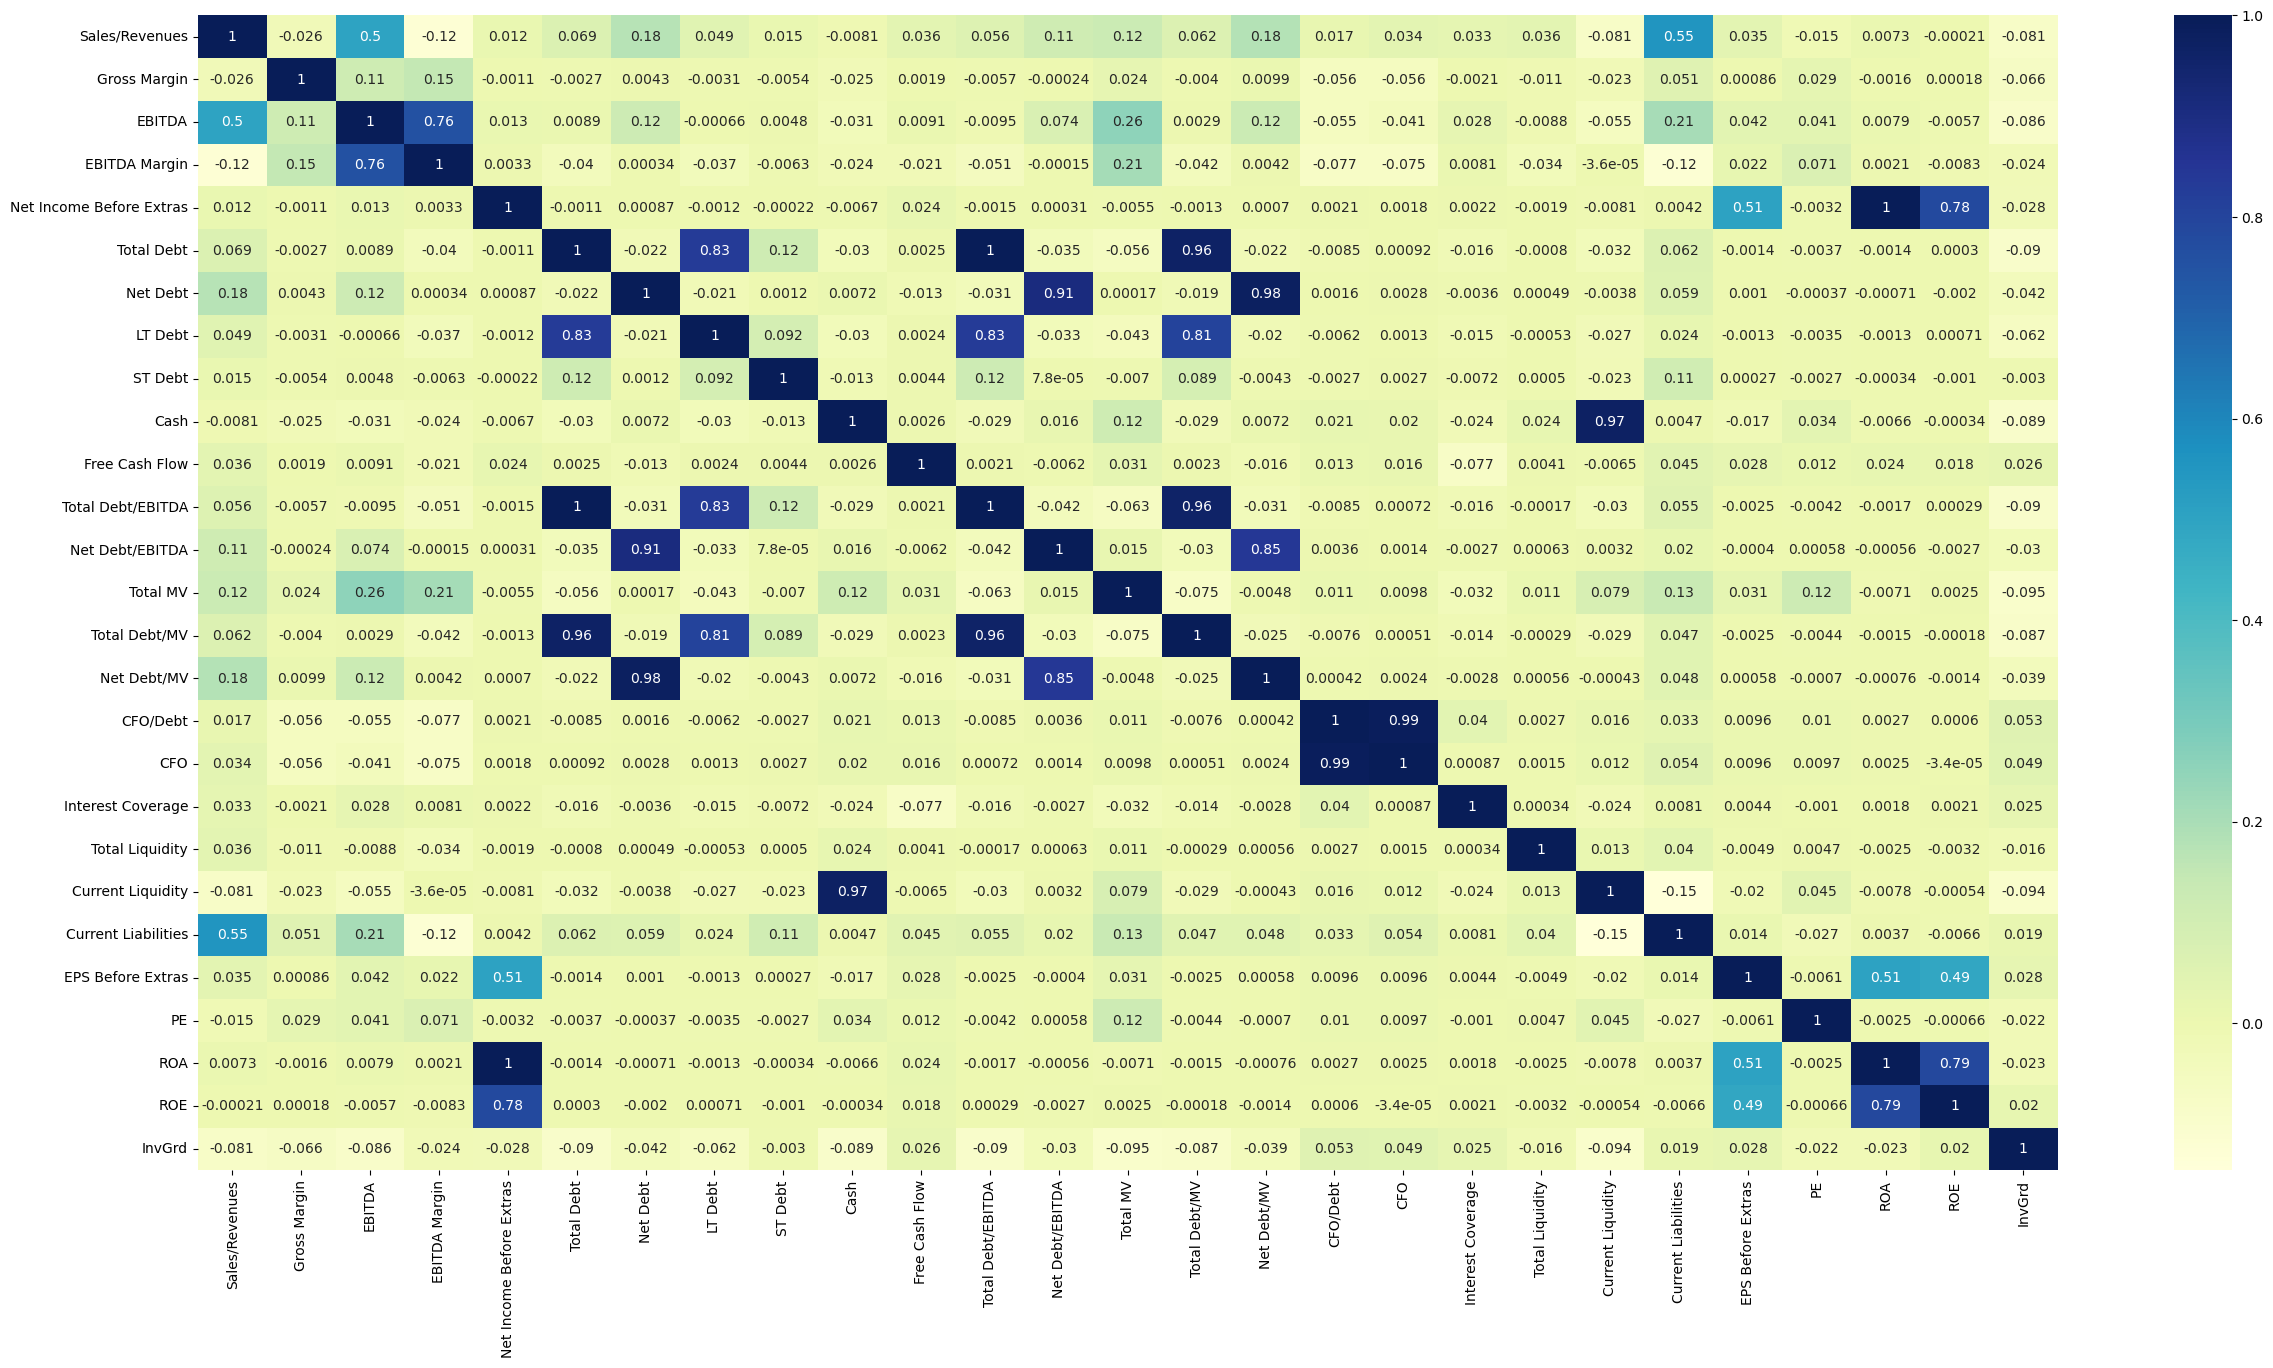

In [6]:
mp.figure(figsize=(30,15))
crln=data.corr()
sns.heatmap(crln,xticklabels=crln.columns,yticklabels=crln.columns,annot=True, cmap="YlGnBu")

**Checking Null Value**

In [7]:
data.isnull().sum()

Sales/Revenues              0
Gross Margin                0
EBITDA                      0
EBITDA Margin               0
Net Income Before Extras    0
Total Debt                  0
Net Debt                    0
LT Debt                     0
ST Debt                     0
Cash                        0
Free Cash Flow              0
Total Debt/EBITDA           0
Net Debt/EBITDA             0
Total MV                    0
Total Debt/MV               0
Net Debt/MV                 0
CFO/Debt                    0
CFO                         0
Interest Coverage           0
Total Liquidity             0
Current Liquidity           0
Current Liabilities         0
EPS Before Extras           0
PE                          0
ROA                         0
ROE                         0
InvGrd                      0
Rating                      0
dtype: int64

**Checking data distribution in all features**

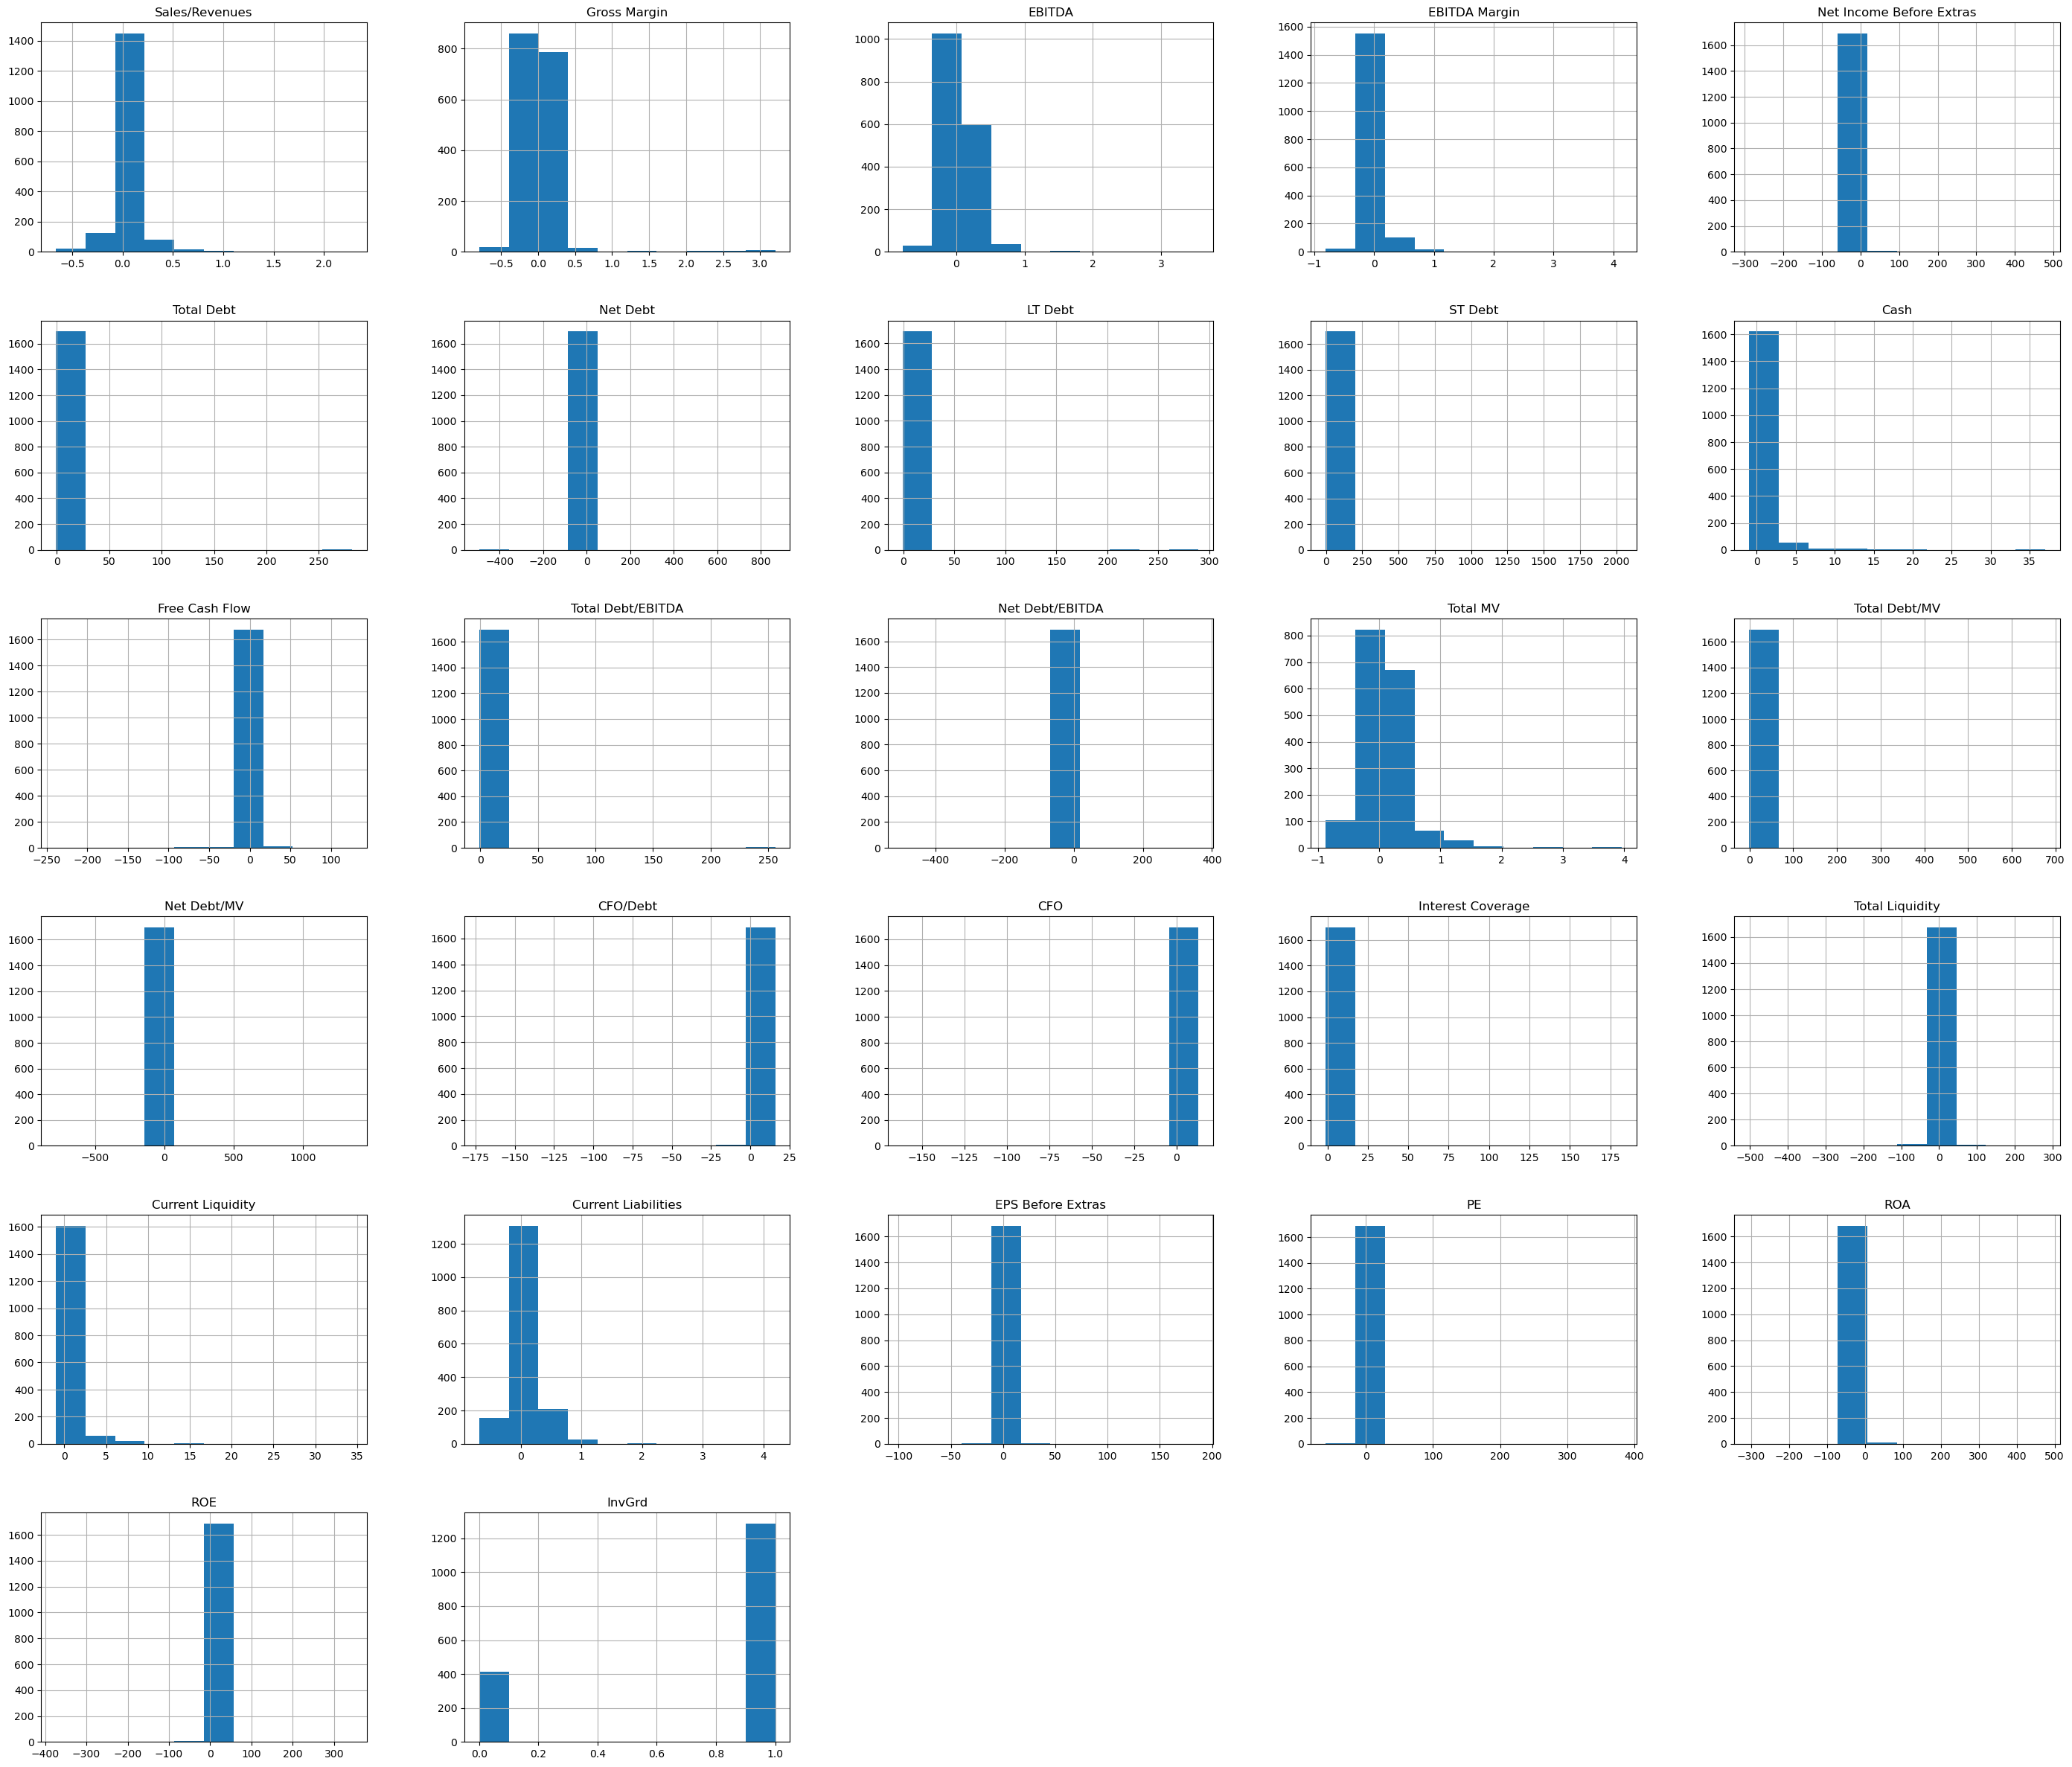

In [8]:
data.hist(figsize=(35,30))
mp.show()

**Function for removing outliers**

In [9]:
def remove_outliers(X_train):
    for feature in X_train.columns:
        frt_quartile =np.quantile(X_train[feature], 0.25)
        trd_quartile = np.quantile(X_train[feature], 0.75)
        int_quartile = trd_quartile - frt_quartile
        upper=trd_quartile+(1.5*int_quartile)
        lower=frt_quartile-(1.5*int_quartile)
        X_train.loc[X_train[feature] < lower, feature] = lower # Outliers in lower boundaries replaced with lower 
        X_train.loc[X_train[feature] > upper, feature] = upper # Outliers in upper boundaries replaced with upper

In [10]:
X = data.iloc[:, :-2]                          # except last 2 columns of the training dataset used to form input data
y_rating = data['Rating']                      # Mapping corresponding target column to Rating variable
y_grading = data['InvGrd']                     # Mapping corresponding target column to Grading variable

**Pie chart for check the percentage distribution of each class in Investment Rating**

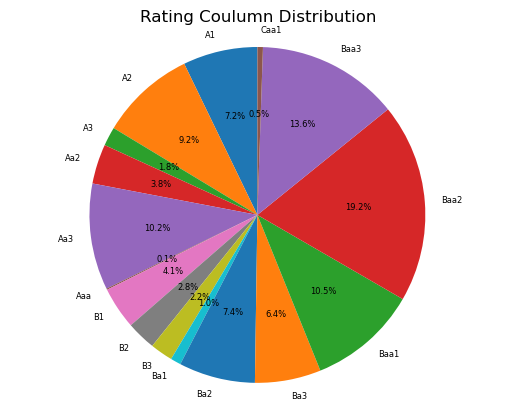

In [11]:

data['Count'] = data['Rating'].map(data['Rating'].value_counts())         # Calculating the counts distict class values

data['Percentage'] = (data['Count'] / data['Count'].sum()) * 100          # Calculating the percentage of each values

labels = data['Rating'].unique()                                          # Get unique class labels
sizes = data.groupby('Rating')['Percentage'].first().values               # Get the percentage for each unique class
textprops = {'fontsize': 6}

# Plot the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops=textprops)
plt.axis('equal') 
plt.title('Rating Coulumn Distribution')
plt.show()

**Pie chart for check the percentage distribution of each class in Investment Grade**

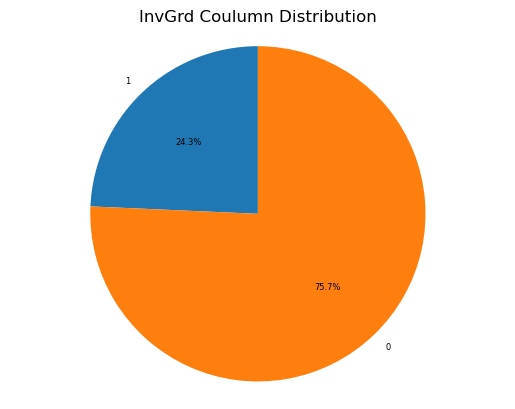

In [12]:

data['Count'] = data['InvGrd'].map(data['InvGrd'].value_counts())
data['Percentage'] = (data['Count'] / data['Count'].sum()) * 100
labels = data['InvGrd'].unique() 
sizes = data.groupby('InvGrd')['Percentage'].first().values 
textprops = {'fontsize': 6}
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops=textprops)
plt.axis('equal')
plt.title('InvGrd Coulumn Distribution')
plt.show()

**Box plot of Outliers**

<AxesSubplot:>

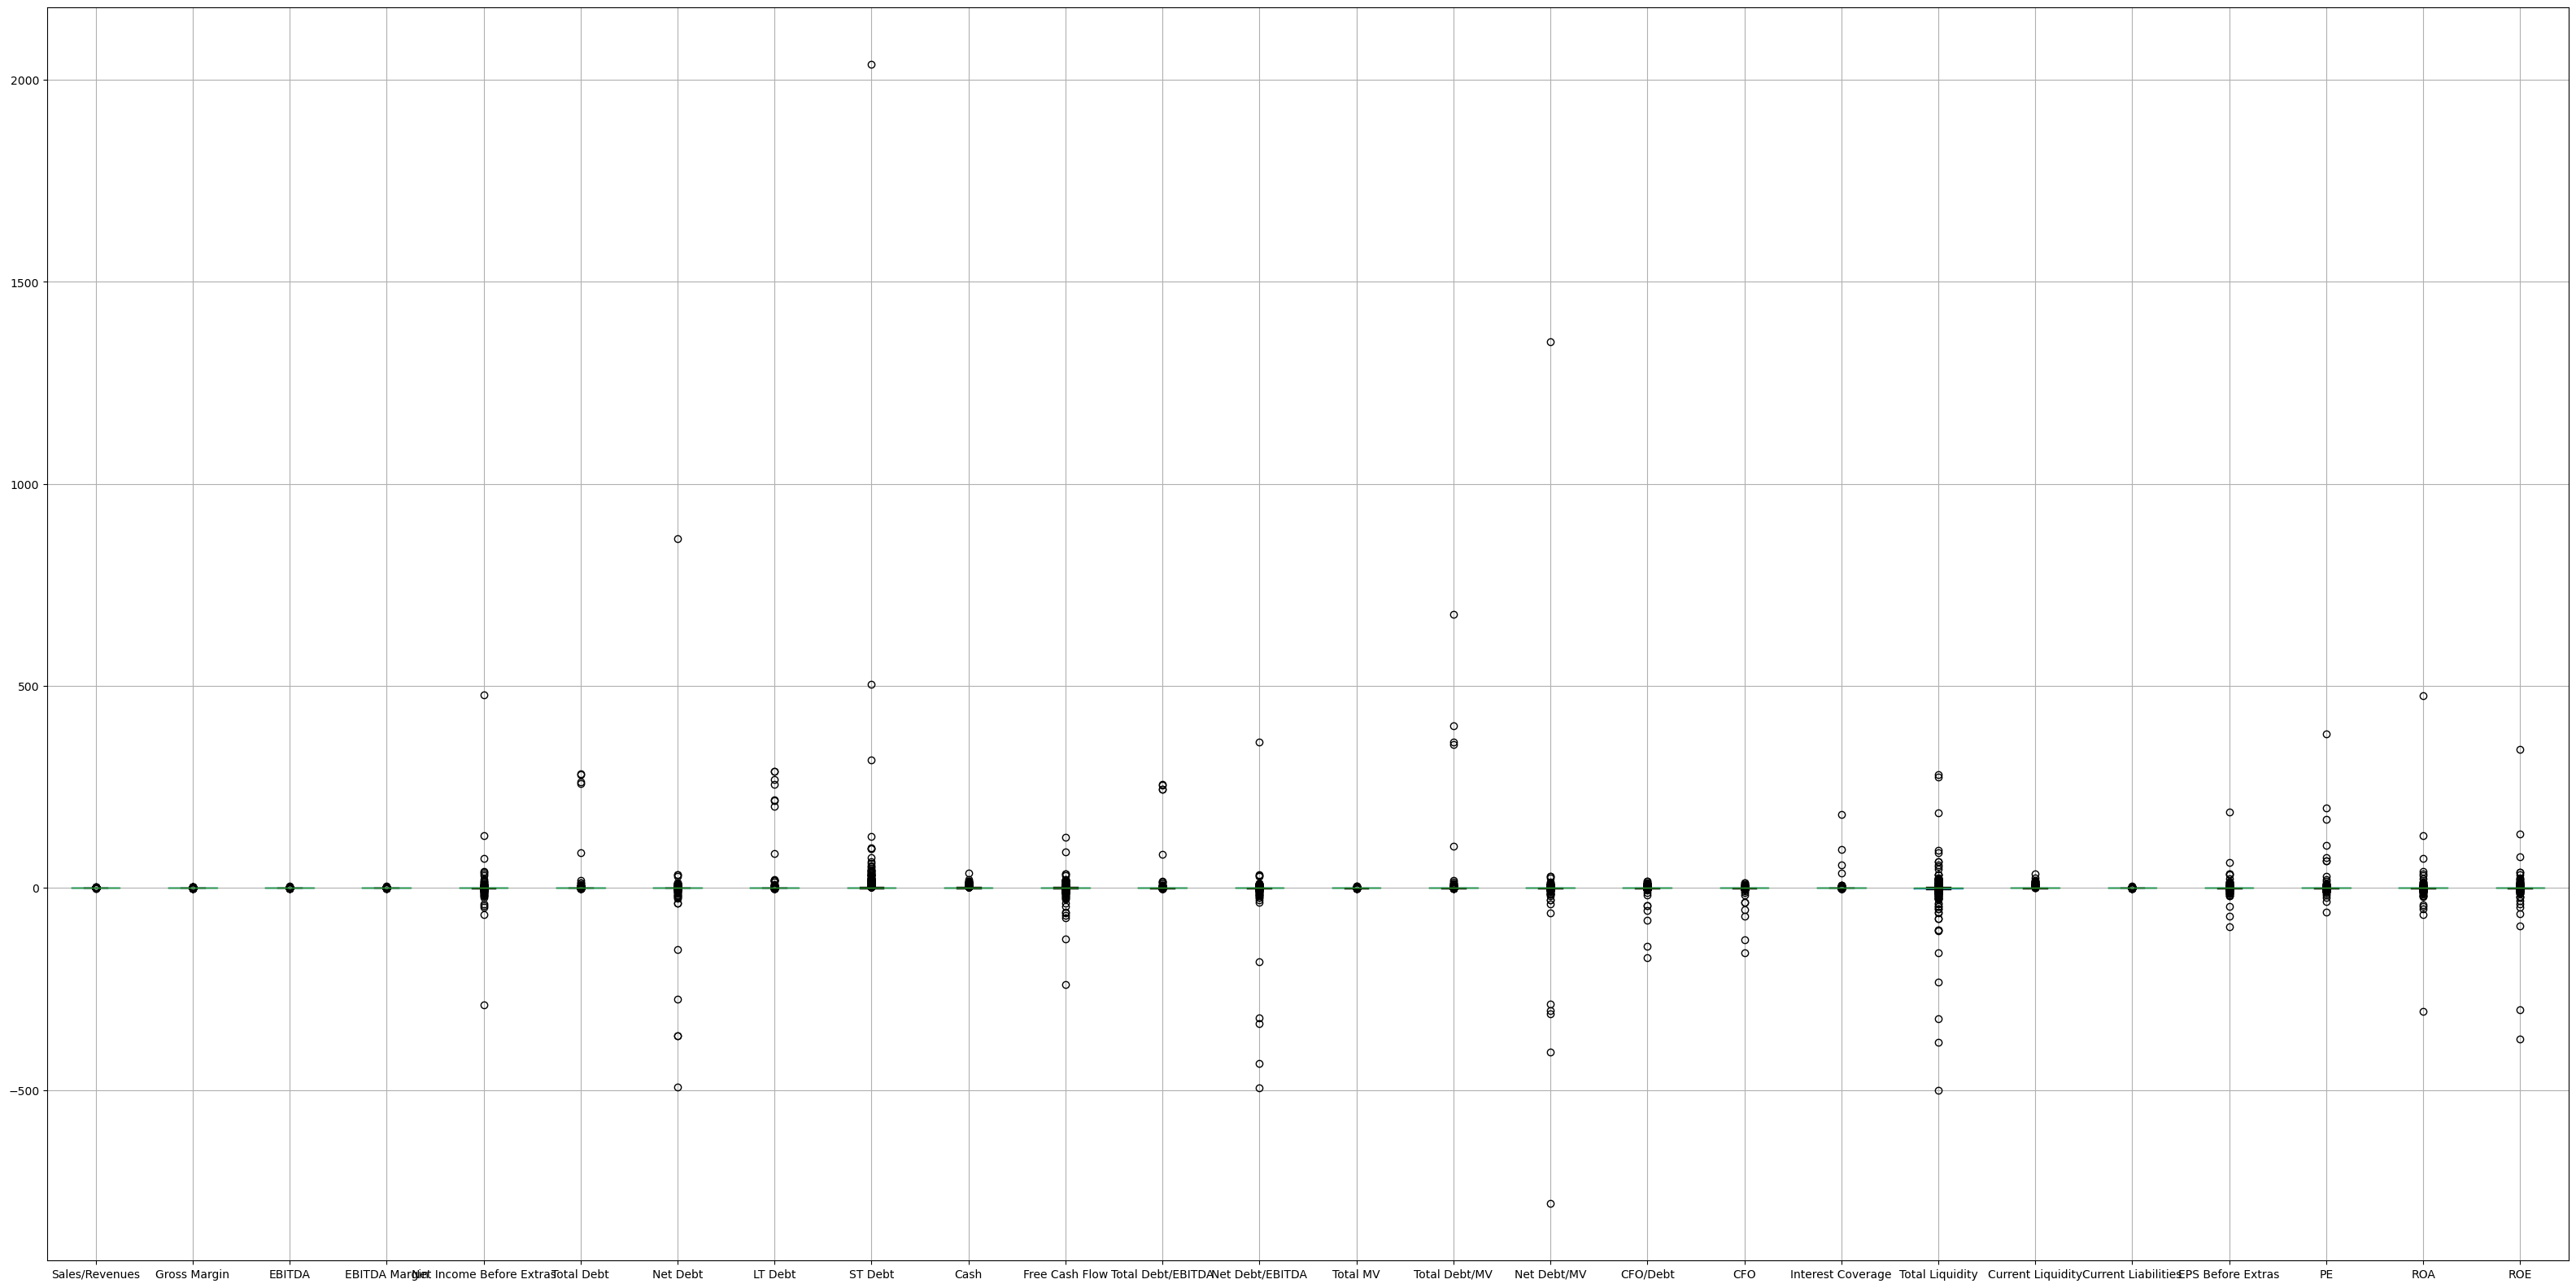

In [13]:
X.boxplot(figsize=(40,20))

In [14]:
rating_codes = {label: i for i, label in enumerate(data['Rating'].unique())}
data['y_rating'] = data['Rating'].map(rating_codes)
y_multiclass = data['y_rating']
y_binary = data['InvGrd']

**Split the data into training and testing sets in 80:20 ratio**

In [15]:
X_train, X_test, y_train_multiclass, y_test_multiclass, y_train_binary, y_test_binary = train_test_split(X, y_multiclass, y_binary, test_size=0.2, random_state=42)

## Linear Regression

In [16]:
lin_reg_ridge = Ridge(alpha=.0001)                                             # Initializing Ridge and Lasso models
lin_reg_lasso = Lasso(alpha=.0001)

lin_reg_ridge.fit(X_train, y_train_binary)                                     # Fit Ridge model
lin_reg_lasso.fit(X_train, y_train_binary)                                     # Fit Lasso model


y_pred_lin_ridge = lin_reg_ridge.predict(X_test)                                   # Predict on value using Ridge
y_pred_binary_lin_ridge = np.where(y_pred_lin_ridge >= 0.6, 1, 0)              

y_pred_lin_lasso = lin_reg_lasso.predict(X_test)                                    # Predict on value using Lasso
y_pred_binary_lin_lasso = np.where(y_pred_lin_lasso >= 0.6, 1, 0)


### Evaluation Matrices

**Accuracy**

In [17]:
accuracy_lin_ridge = accuracy_score(y_test_binary, y_pred_binary_lin_ridge)                # Accuracy of Ridge
print("Accuracy of Linear Regression with Ridge regularization: ", accuracy_lin_ridge)

accuracy_lin_lasso = accuracy_score(y_test_binary, y_pred_binary_lin_lasso)                # Accuracy of Lasso
print("Accuracy of Linear Regression with Lasso Regularization: ", accuracy_lin_lasso)


Accuracy of Linear Regression with Ridge regularization:  0.7735294117647059
Accuracy of Linear Regression with Lasso Regularization:  0.7735294117647059


**Confusion Matrices Linear Regression**

Confusion Matrix of Linear Regression with Ridge regularization: 


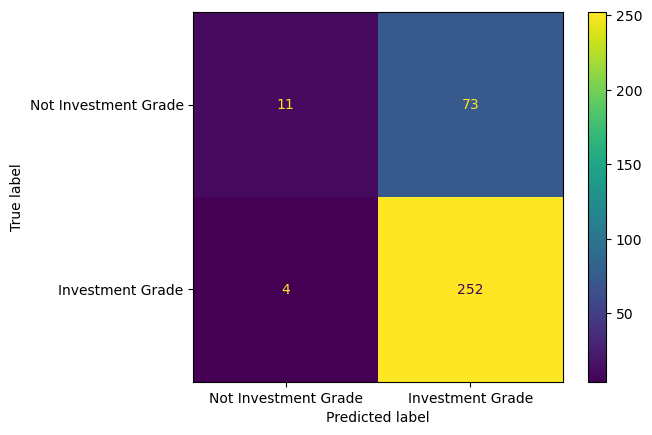

Confusion Matrix of Linear Regression with Lasso regularization: 


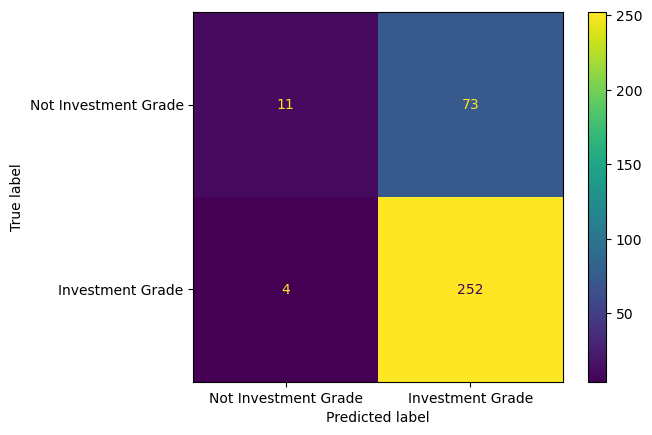

In [18]:
cm_lin_ridge = confusion_matrix(y_test_binary, y_pred_binary_lin_ridge)                    #Confusion matrix for Ridge
print("Confusion Matrix of Linear Regression with Ridge regularization: ")
disp_lin_ridge = ConfusionMatrixDisplay(confusion_matrix=cm_lin_ridge,
                               display_labels=["Not Investment Grade", "Investment Grade"])
disp_lin_ridge.plot()
plt.show()

                                                         
cm_lin_lasso = confusion_matrix(y_test_binary, y_pred_binary_lin_lasso)                     #Confusion matrix for Lasso
print("Confusion Matrix of Linear Regression with Lasso regularization: ")
disp_lin_lasso = ConfusionMatrixDisplay(confusion_matrix=cm_lin_lasso,
                               display_labels=["Not Investment Grade", "Investment Grade"])
disp_lin_lasso.plot()
plt.show()


**Classification Reports of Linear Regression**

In [19]:
cr_lin_ridge = classification_report(y_test_binary, y_pred_binary_lin_ridge)                # Classification report for Ridge
print("Classification Report with Ridge regularization: ")
print(cr_lin_ridge)

cr_lin_lasso = classification_report(y_test_binary, y_pred_binary_lin_lasso)                # Classification report for Lasso
print("Classification Report with Lasso regularization: ")
print(cr_lin_lasso)

Classification Report with Ridge regularization: 
              precision    recall  f1-score   support

           0       0.73      0.13      0.22        84
           1       0.78      0.98      0.87       256

    accuracy                           0.77       340
   macro avg       0.75      0.56      0.54       340
weighted avg       0.76      0.77      0.71       340

Classification Report with Lasso regularization: 
              precision    recall  f1-score   support

           0       0.73      0.13      0.22        84
           1       0.78      0.98      0.87       256

    accuracy                           0.77       340
   macro avg       0.75      0.56      0.54       340
weighted avg       0.76      0.77      0.71       340



ROC AUC Score with Ridge regularization:  0.6265345982142856
ROC AUC Score with Lasso regularization:  0.6258370535714286


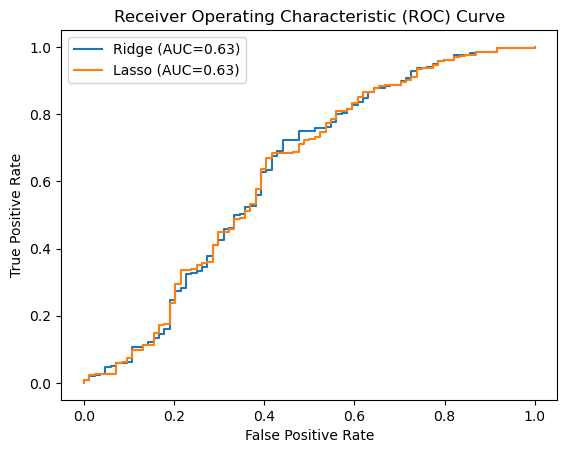

In [20]:
roc_auc_ridge = roc_auc_score(y_test_binary, y_pred_lin_ridge)                   # ROC AUC score for Ridge
print("ROC AUC Score with Ridge regularization: ", roc_auc_ridge)

fpr_ridge, tpr_ridge, thresholds_ridge = roc_curve(y_test_binary, y_pred_lin_ridge) # ROC curve for Ridge

roc_auc_lasso = roc_auc_score(y_test_binary, y_pred_lin_lasso)                   #ROC AUC score for Lasso
print("ROC AUC Score with Lasso regularization: ", roc_auc_lasso)

fpr_ridge, tpr_ridge, thresholds_ridge = roc_curve(y_test_binary, y_pred_lin_ridge) # Plot ROC curve for Ridge
plt.plot(fpr_ridge, tpr_ridge, label="Ridge (AUC={:.2f})".format(roc_auc_ridge))

fpr_lasso, tpr_lasso, thresholds_lasso = roc_curve(y_test_binary, y_pred_lin_lasso) # Plot ROC curve for Lasso
plt.plot(fpr_lasso, tpr_lasso, label="Lasso (AUC={:.2f})".format(roc_auc_lasso))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Logistic Regression

Logistic Regression with Ridge (L1) regularization

In [21]:

log_ridge = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
parameters = {'C': [0.001, 0.01, 0.1, .0001, .00001, .000001]}  # Hyperparameter tuning for regularization strength
log_clf_ridge = GridSearchCV(log_ridge, parameters, cv=10)
log_clf_ridge.fit(X_train, y_train_binary)
best_param_ridge = log_clf_ridge.best_params_['C']
print("Best Parameter - Ridge", best_param_ridge )
y_pred_log_ridge = log_clf_ridge.predict(X_test)                                            # Predictions

Best Parameter - Ridge 0.01


Logistic Regression with Lasso (L2) regularization

In [22]:
log_lasso = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)
parameters = {'C': [0.001, 0.01, 0.1, .0001, .00001, .000001]}  # Hyperparameter tuning for regularization strength
log_clf_lasso = GridSearchCV(log_lasso, parameters, cv=10)
log_clf_lasso.fit(X_train, y_train_binary)
best_param_lasso = log_clf_lasso.best_params_['C']
print("Best Parameter - Lasso", best_param_lasso )
y_pred_log_lasso = log_clf_lasso.predict(X_test)                                         # Prediction

Best Parameter - Lasso 0.001


### Evaluation

Accuracy

In [23]:
accuracy_log_ridge = accuracy_score(y_test_binary, y_pred_log_ridge)
print("Accuracy - Ridge : ", accuracy_log_ridge)
accuracy_log_lasso = accuracy_score(y_test_binary, y_pred_log_lasso)
print("Accuracy - Lasso: ", accuracy_log_lasso)

Accuracy - Ridge :  0.7529411764705882
Accuracy - Lasso:  0.7529411764705882


Confusion Matrix of Logistic Regression

Confusion Matrix with Ridge regularization: 


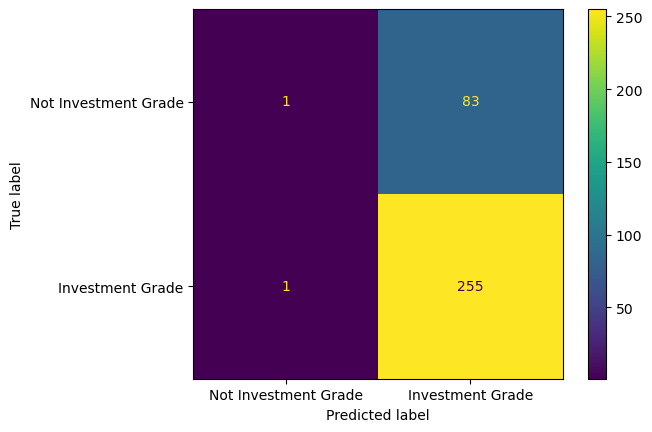

Confusion Matrix with Lasso regularization: 


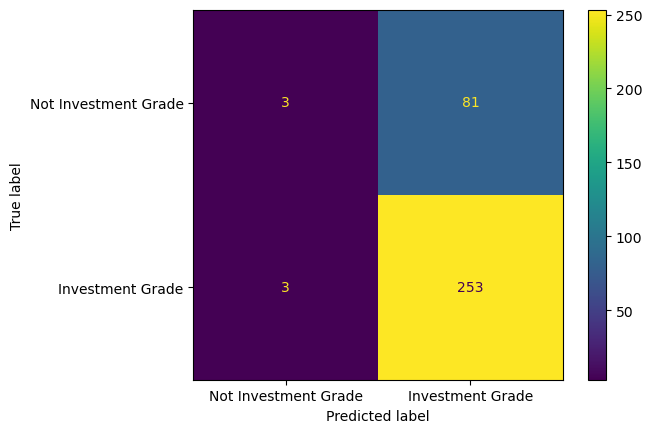

In [24]:
cm_log_ridge = confusion_matrix(y_test_binary, y_pred_log_ridge)
print("Confusion Matrix with Ridge regularization: ")
disp_log_ridge = ConfusionMatrixDisplay(confusion_matrix=cm_log_ridge,
                               display_labels=["Not Investment Grade", "Investment Grade"])
disp_log_ridge.plot()
plt.show()



cm_log_lasso = confusion_matrix(y_test_binary, y_pred_log_lasso)
print("Confusion Matrix with Lasso regularization: ")
disp_log_lasso = ConfusionMatrixDisplay(confusion_matrix=cm_log_lasso,
                               display_labels=["Not Investment Grade", "Investment Grade"])
disp_log_lasso.plot()
plt.show()


Classification Report - Logistic Regression

In [25]:
classification_report_log_ridge = classification_report(y_test_binary, y_pred_log_ridge)
classification_report_log_lasso = classification_report(y_test_binary, y_pred_log_lasso)

print("Logistic Regression with Ridge regularization:")
print("Classification Report: \n", classification_report_log_ridge)

print("Logistic Regression with Lasso  regularization:")
print("Classification Report: \n", classification_report_log_lasso)

Logistic Regression with Ridge regularization:
Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.01      0.02        84
           1       0.75      1.00      0.86       256

    accuracy                           0.75       340
   macro avg       0.63      0.50      0.44       340
weighted avg       0.69      0.75      0.65       340

Logistic Regression with Lasso  regularization:
Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.04      0.07        84
           1       0.76      0.99      0.86       256

    accuracy                           0.75       340
   macro avg       0.63      0.51      0.46       340
weighted avg       0.69      0.75      0.66       340



ROC Curve

ROC AUC Score with Ridge regularization:  0.5039992559523809
ROC AUC Score with Lasso regularization:  0.5119977678571429


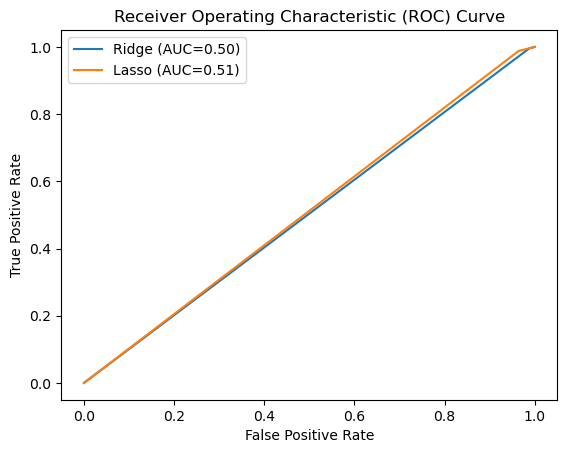

In [26]:
roc_auc_log_ridge = roc_auc_score(y_test_binary, y_pred_log_ridge)                       #ROC AUC score for Ridge
print("ROC AUC Score with Ridge regularization: ", roc_auc_log_ridge)
fpr_ridge, tpr_ridge, thresholds_ridge = roc_curve(y_test_binary, y_pred_log_ridge)


roc_auc_log_lasso = roc_auc_score(y_test_binary, y_pred_log_lasso)                       #ROC AUC score for Lasso
print("ROC AUC Score with Lasso regularization: ", roc_auc_log_lasso)

fpr_ridge, tpr_ridge, thresholds_ridge = roc_curve(y_test_binary, y_pred_log_ridge)
plt.plot(fpr_ridge, tpr_ridge, label="Ridge (AUC={:.2f})".format(roc_auc_log_ridge)) # Plot ROC curve for Ridge

fpr_lasso, tpr_lasso, thresholds_lasso = roc_curve(y_test_binary, y_pred_log_lasso)
plt.plot(fpr_lasso, tpr_lasso, label="Lasso (AUC={:.2f})".format(roc_auc_log_lasso)) # Plot ROC curve for Lasso

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

##Neural Network

**Removing Outliers**

<AxesSubplot:>

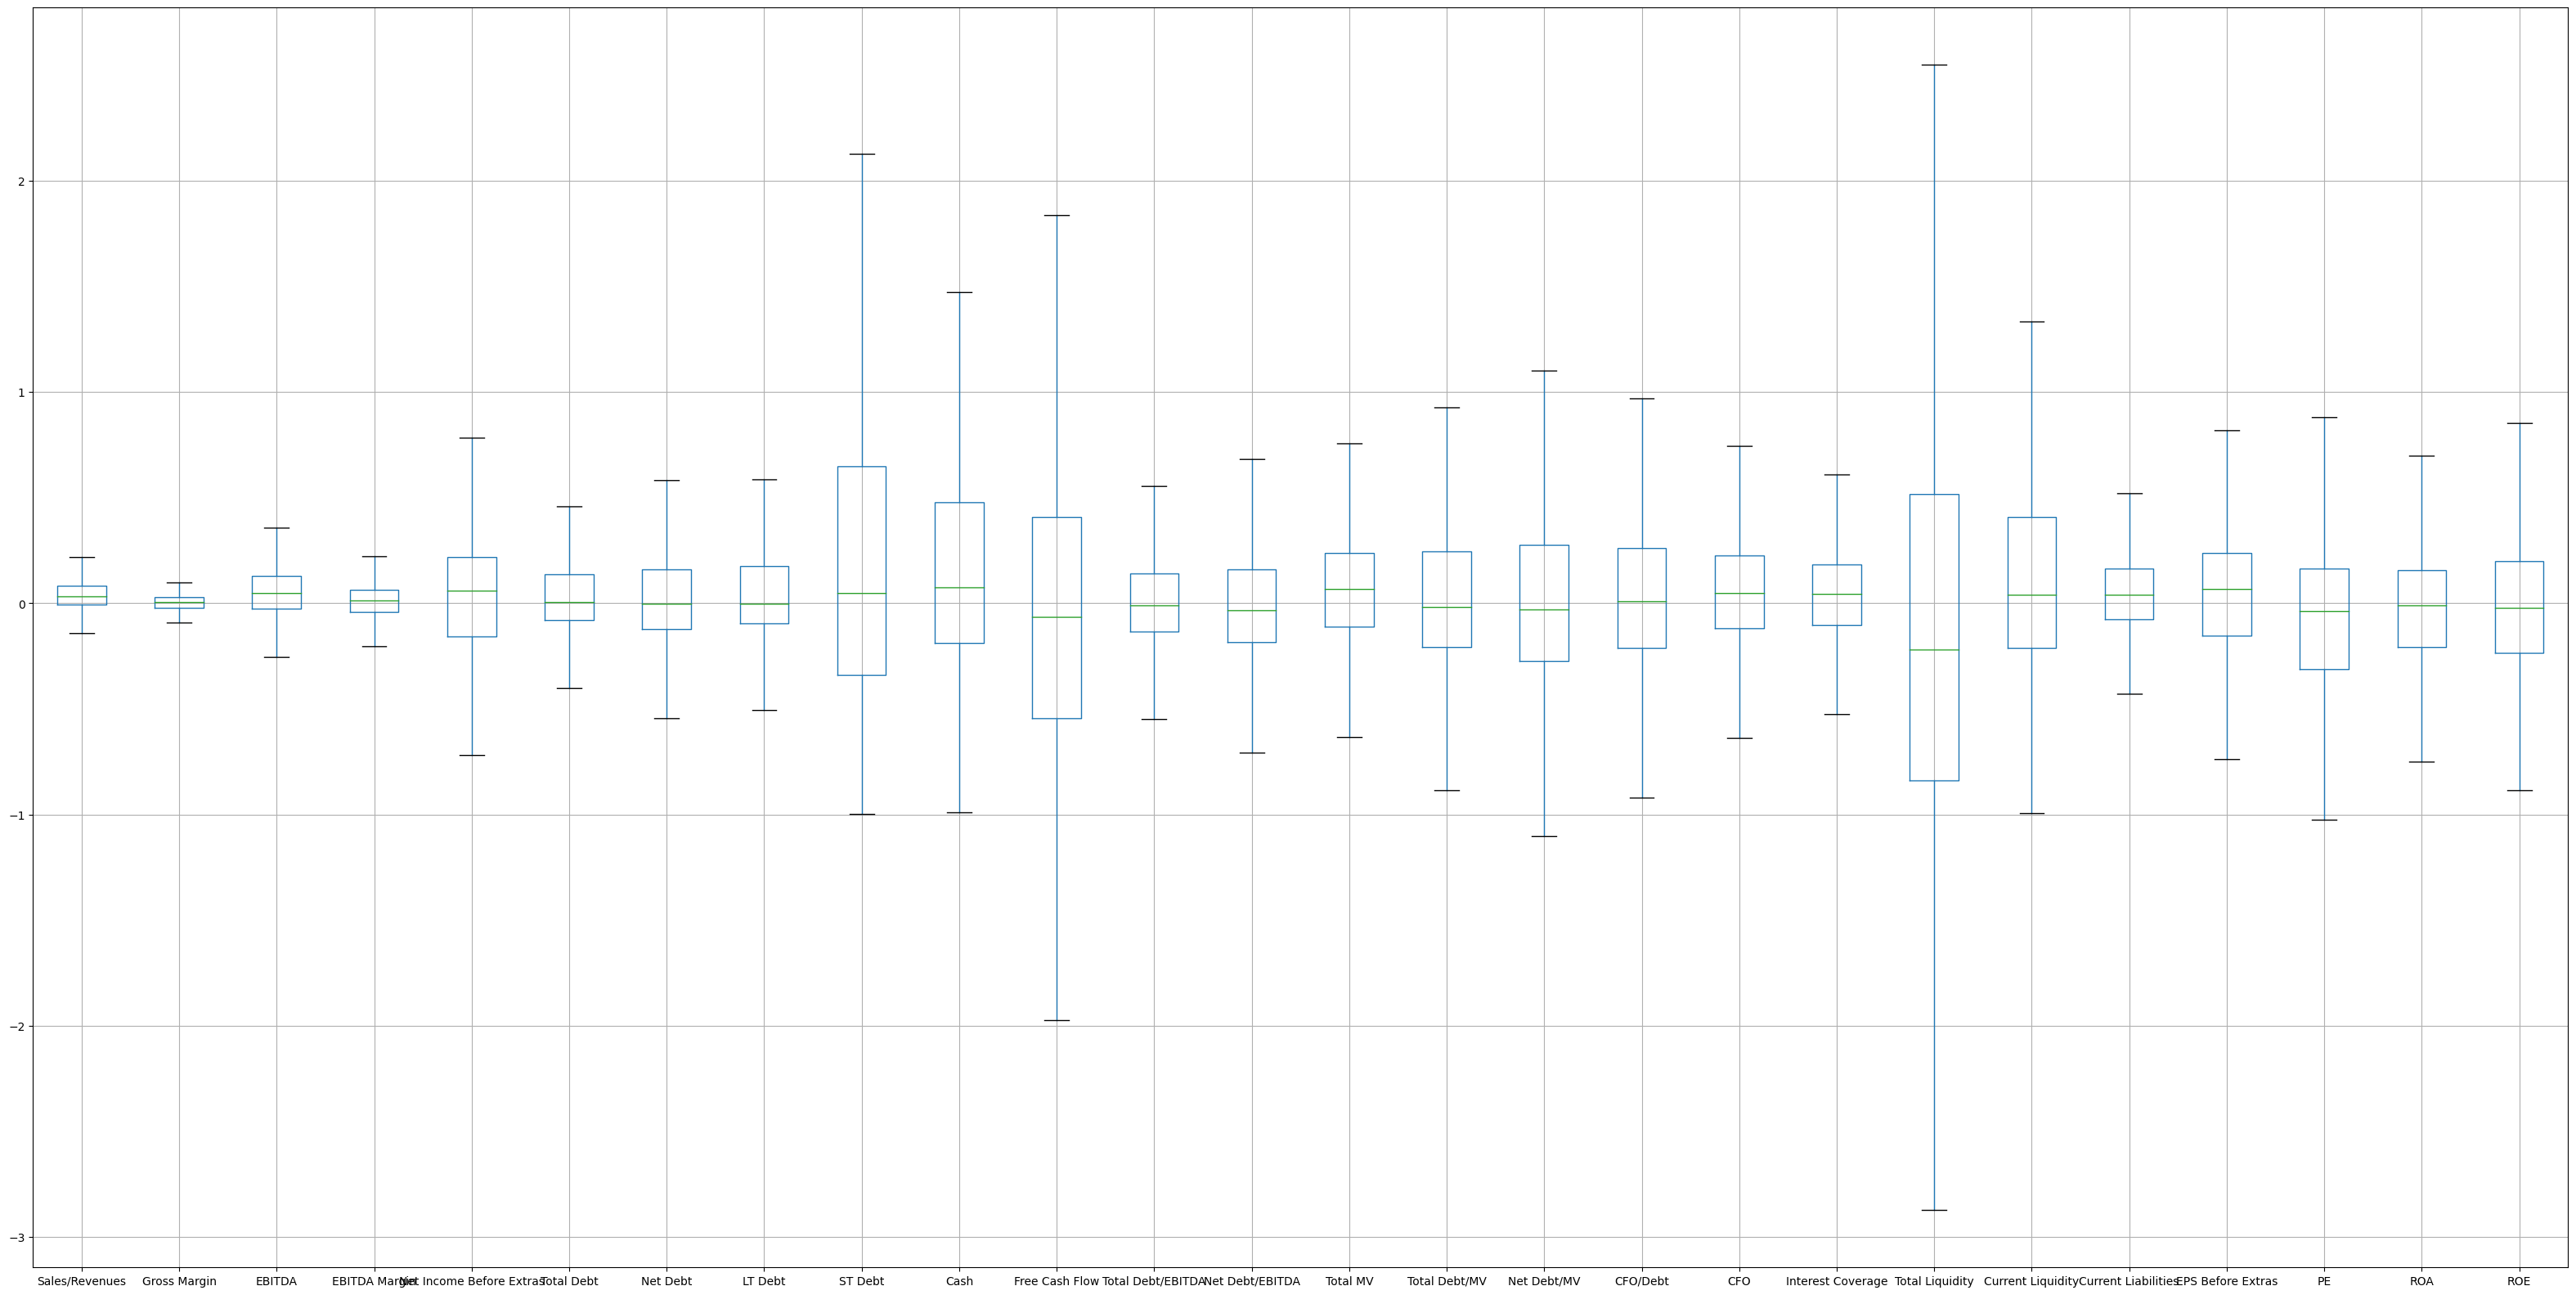

In [27]:
remove_outliers(X_train)
remove_outliers(X_test) 
X_train.boxplot(figsize=(40,20))

**Convert multi-class labels to categorical**

In [28]:
y_train_investment_rating = to_categorical(y_train_multiclass)
y_test_investment_rating = to_categorical(y_test_multiclass)

**Investment Rating classification model training**

In [43]:
learning_rate = 0.0000001 

model_investment_rating = Sequential()                                                 # defenition of multi-class classification model
model_investment_rating.add(Dense(64, activation='relu', input_shape=(26,)))
model_investment_rating.add(Dense(32, activation='relu'))
model_investment_rating.add(Dense(16, activation='softmax'))


optimizer = Adam(lr=learning_rate)
model_investment_rating.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model_investment_rating.fit(X_train, y_train_investment_rating, epochs=300, batch_size=32, validation_data=(X_test, y_test_investment_rating)) # training the model

y_pred_investment_rating = model_investment_rating.predict(X_test)              # Evaluation of investment rating classification model
y_pred_investment_rating = np.argmax(y_pred_investment_rating, axis=1)
y_true_investment_rating = np.argmax(y_test_investment_rating, axis=1)

Epoch 1/300
43/43 [==============================] - 1s 7ms/step - loss: 2.7014 - accuracy: 0.1221 - val_loss: 2.6187 - val_accuracy: 0.1794
Epoch 2/300
43/43 [==============================] - 0s 4ms/step - loss: 2.5268 - accuracy: 0.2044 - val_loss: 2.5056 - val_accuracy: 0.1941
Epoch 3/300
43/43 [==============================] - 0s 4ms/step - loss: 2.4199 - accuracy: 0.2074 - val_loss: 2.4350 - val_accuracy: 0.2000
Epoch 4/300
43/43 [==============================] - 0s 4ms/step - loss: 2.3531 - accuracy: 0.2272 - val_loss: 2.3851 - val_accuracy: 0.2118
Epoch 5/300
43/43 [==============================] - 0s 4ms/step - loss: 2.2978 - accuracy: 0.2272 - val_loss: 2.3475 - val_accuracy: 0.2206
Epoch 6/300
43/43 [==============================] - 0s 4ms/step - loss: 2.2538 - accuracy: 0.2368 - val_loss: 2.3220 - val_accuracy: 0.2265
Epoch 7/300
43/43 [==============================] - 0s 5ms/step - loss: 2.2108 - accuracy: 0.2493 - val_loss: 2.2970 - val_accuracy: 0.2353
Epoch 8/300
4

**Reverting the numerical value of investment rating to catergorical value**

In [44]:
multiclass_unique_combination = data[['Rating', 'y_rating']].drop_duplicates(keep='first')
result_multiclass = multiclass_unique_combination.set_index(['y_rating']).to_dict()['Rating']
vfunc = np.vectorize(lambda x: result_multiclass[x])
y_pred_investment_rating = vfunc(y_pred_investment_rating)
y_true_investment_rating = vfunc(y_true_investment_rating)

**Confusion Matrix of Investment Rating**

In [45]:
print("Confusion Matrix (Invesment Rating Classification):")
print(confusion_matrix(y_true_investment_rating, y_pred_investment_rating))

print("Classification Report (Invesment Rating Classification):")
print(classification_report(y_true_investment_rating, y_pred_investment_rating))

Confusion Matrix (Invesment Rating Classification):
[[12  1  1  1  4  0  0  0  0  0  0  2  1  2  0]
 [ 4 11  1  1  3  0  0  0  0  1  4  3  2  3  0]
 [ 1  0  1  0  0  0  0  0  0  0  0  0  1  2  0]
 [ 1  0  0  6  1  0  0  0  0  0  0  3  4  0  0]
 [ 3  2  0  0 31  0  0  0  1  0  0  4  0  1  0]
 [ 0  2  0  0  0  6  0  0  0  1  3  1  2  4  0]
 [ 0  1  0  0  1  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  1  4  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  1  1  0  2  1  1  0]
 [ 1  0  0  0  0  0  0  0  0 16  0  3  3  0  0]
 [ 1  3  0  0  0  1  1  0  0  1 10  1  3  2  0]
 [ 1  2  0  1  5  1  0  0  0  0  1 15  3  2  0]
 [ 2  2  0  0  3  0  1  2  0  2  2  5 35  9  0]
 [ 0  2  0  0  0  0  0  0  0  4  1  5  2 29  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]]
Classification Report (Invesment Rating Classification):
              precision    recall  f1-score   support

          A1       0.46      0.50      0.48        24
          A2       0.42      0.33      0.37        33
       

**Using the result of investment rating classification converting it to binary classification**

In [46]:
unique_combinations = data[['Rating', 'InvGrd']].drop_duplicates(keep='first')   # Taking unique combination of values of Rating and InvGrd
result_dict = unique_combinations.set_index(['Rating']).to_dict()['InvGrd']     # Creating a dictionary and mapping the values in two columns
vfunc = np.vectorize(lambda x: result_dict[x])                                     
y_pred_investment_grade = vfunc(y_pred_investment_rating)                        # Converting the classification result of investment rating to binary

**Confusion Matrix of Investment Grade**

Confusion Matrix Investment Grade:


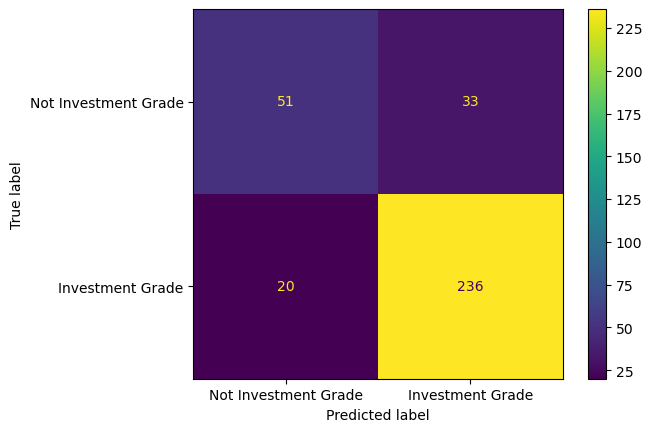

Classification Report Investment Grade:
              precision    recall  f1-score   support

           0       0.72      0.61      0.66        84
           1       0.88      0.92      0.90       256

    accuracy                           0.84       340
   macro avg       0.80      0.76      0.78       340
weighted avg       0.84      0.84      0.84       340



In [47]:
print("Confusion Matrix Investment Grade:")
cm_nn = confusion_matrix(y_test_binary, y_pred_investment_grade)
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn,
                               display_labels=["Not Investment Grade", "Investment Grade"])
disp_nn.plot()
plt.show()
print("Classification Report Investment Grade:")
print(classification_report(y_test_binary, y_pred_investment_grade))

**ROC Score Investment Grade** 

In [48]:
roc_auc = roc_auc_score(y_test_binary, y_pred_investment_grade) # ROC score calculation
print("ROC AUC Score with Lasso regularization: ", roc_auc)

ROC AUC Score with Lasso regularization:  0.7645089285714286


**ROC Curve Investment Grade**

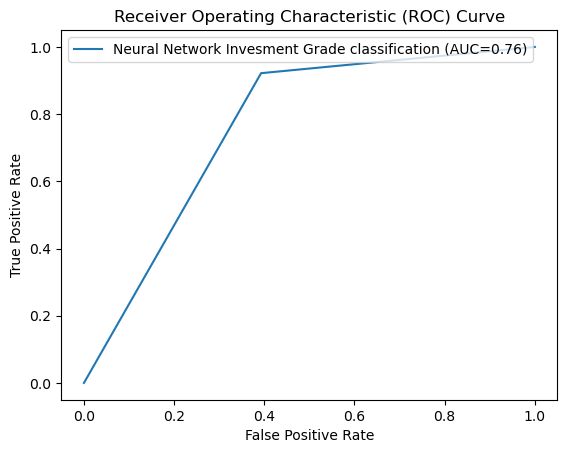

In [49]:
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_investment_grade) # Ploting ROC Curve
plt.plot(fpr, tpr, label="Neural Network Invesment Grade classification (AUC={:.2f})".format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()